In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score



In [153]:
#load red wine data
df = pd.read_csv("winequality-red.csv", sep = ';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [154]:
#load white wine data
df2 = pd.read_csv("winequality-white.csv", sep = ';')
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [155]:
#Summary Statistics For Red Wine 
summary_stats = df[["quality", "fixed acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]].describe()
summary_stats

,quality,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,5.636023,8.319637,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,0.807569,1.741096,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,3.000000,4.600000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,5.000000,7.100000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,6.000000,7.900000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,6.000000,9.200000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,8.000000,15.900000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [156]:
#Summary Statistics For White Wine
summary_stats2 = df2[["quality","fixed acidity","citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]].describe()
summary_stats2

,quality,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,5.877909,6.854788,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.885639,0.843868,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.000000,3.800000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,5.000000,6.300000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.000000,6.800000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,6.000000,7.300000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,9.000000,14.200000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


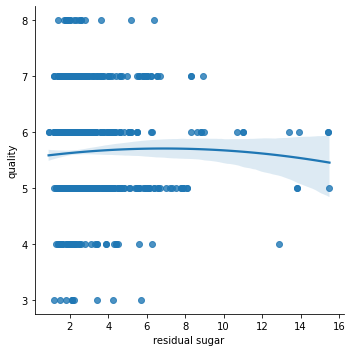

In [157]:
#Calculating for quality with residual sugar as a factor for RED wine
sns.lmplot(x ="residual sugar", y = "quality", data = df, order = 2, )

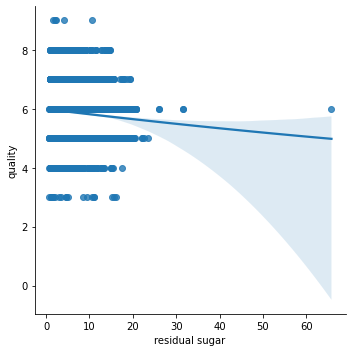

In [158]:
#Calculating for quality with residual as a factor for WHITE wine
sns.lmplot(x = "residual sugar", y = "quality", data = df2, order = 2,)

<hey>

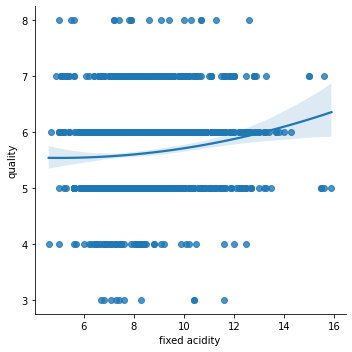

In [159]:
#Calculating for quality with fixed acidity as a factor for RED wine
sns.lmplot(x ="fixed acidity", y = "quality", data = df, order = 2)

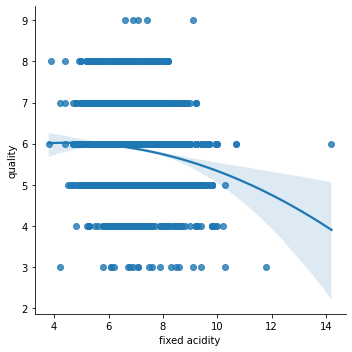

In [160]:
#Calculating for quality with fixed acidity as a factor for WHITE wine
sns.lmplot(x ="fixed acidity", y = "quality", data = df2, order = 2)

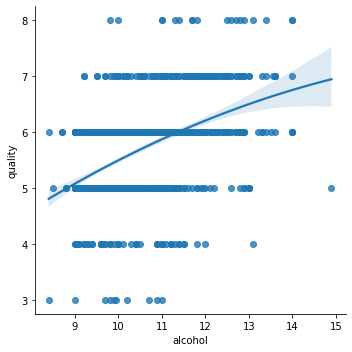

In [161]:
#Calculating for quality with alcohol as a factor for RED wine
sns.lmplot(x ="alcohol", y = "quality", data = df, order = 2)

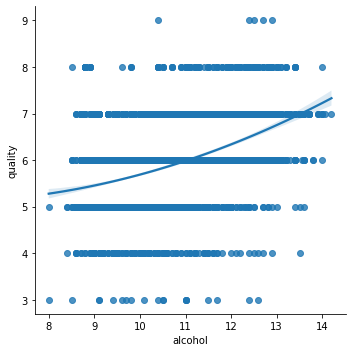

In [162]:
#Calculating for quality with alcohol as a factor for WHITE wine
sns.lmplot(x ="alcohol", y = "quality", data = df2, order = 2)

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

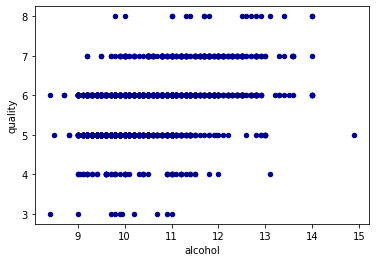

In [163]:
df.plot.scatter(y = 'quality',
                x = 'alcohol',
                c = 'DarkBlue')

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

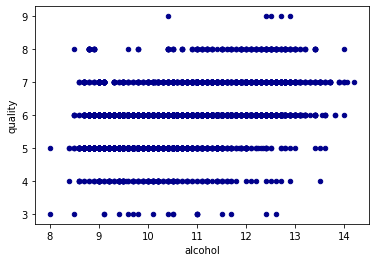

In [164]:
df2.plot.scatter(y = 'quality',
                x = 'alcohol',
                c = 'DarkBlue')

There is a strong positive correlation between alcohol and wine quality. 

In [219]:
x = np.array([df['alcohol']]).reshape(-1,1)
y = np.array([df['quality']]).reshape(-1,1)
x2 = np.array([df2['alcohol']]).reshape(-1,1)
y2 = np.array([df2['quality']]).reshape(-1,1)

In [221]:
model_rsq = model.score(x,y)
model2_rsq = model2.score(x2,y2)
print(model_rsq)
print(model2_rsq)

0.22673436811275482
0.1897253327492563


In [227]:
xx = df['fixed acidity']
yy = df['quality']

In [228]:
correlation_matrix = np.corrcoef(xx, yy)
correlation = correlation_matrix[0, 1]
r_squared = correlation ** 2

print(f'R-squared: {r_squared}')

R-squared: 0.01538881164771051


In [232]:
xx1 = df2['fixed acidity']
yy2 = df2['quality']

In [233]:
correlation_matrix = np.corrcoef(xx1, yy2)
correlation = correlation_matrix[0, 1]
r_squared = correlation ** 2

print(f'R-squared: {r_squared}')

R-squared: 0.012919239085696171


The r-square for alcohol and quality in red wine is 23% and with white wine, 19%, alone, there is not a strong correlation between the two dependent and independent variables, deferring from my original hypothesis

In [242]:
#trying other features ( total sulfur dioxide )
s_d = df['sulphates']
s_d2 = df['quality']

In [243]:
correlation_matrix = np.corrcoef(s_d, s_d2)
correlation = correlation_matrix[0, 1]
r_squared = correlation ** 2

print(f'R-squared: {r_squared}')

R-squared: 0.06320049136455647


Sulphates are the feature with the highest r2 of 60%, meaning y, 60% of the quality rating in the data can be explained by sulphate concentration alone

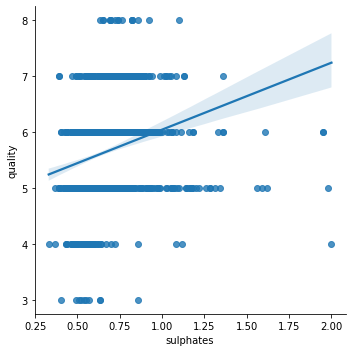

In [250]:
sns.lmplot(x ="sulphates", y = "quality", data = df, order = 1)

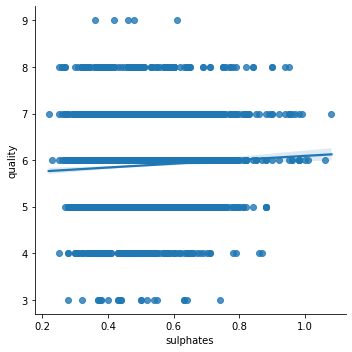

In [251]:
sns.lmplot(x ="sulphates", y = "quality", data = df2, order = 1)